# Mini Lab 7: Time Series

<a target="_blank" href="https://colab.research.google.com/github/browndw/humanities_analytics/blob/main/mini_labs/Mini_Lab_07_Time_Series.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

For this lab, we'll be doing something a little different. We're going to fetch data from Google's Ngram repositories and using that data to plot changes over time.

## Install the libraries

Note that the capture decorator simply supresses the installation output.

In [1]:
%%capture
!pip install google-ngrams

## About the underlying data

The repositories we'll be getting our data from are here:

<http://storage.googleapis.com/books/ngrams/books/datasetsv2.html>

Although they are simple in structure, they can be HUGE, particulary 2-, 3-, 4-, and 5-grams. So generally, you would NOT want to download them and process them locally. The function we'll be using, filters the data as it streams it in, reducing the memory load.

## Load the libraries

Let's import what we'll need to fetch the data, as well as analyze that data.

In [2]:
import polars as pl
from google_ngrams import google_ngram, TimeSeries

## Fetching data

The `google_ngram` function takes three arguments: `word_forms`, `variety`, and `by`. The first must be passed in the form of a list of strings. That list can include a single word like *teenager* or lemmas like *walk*, *walks* and *walked*: e.g., `["walk"]` or `["walk", "walks", "walked"]`. The same principal applies to ngrams > 1: `["teenager is", "teenagers are"]`. The first word in an ngram sequence should be from the same root. So the function would fail to process   ["teenager is", "child is"] . The function will combine the counts of all forms in the returned data frame.

As an example, let's get data for lemmatized *quiz* both by year and by decade.

In [3]:
word_froms = ["quiz", "quizzes", "quizzed"]
quiz_year = google_ngram(word_froms, variety = "eng", by = "year")

In [ ]:
quiz_year.head(10)

Year,Token,AF,RF
i32,list[str],i64,f64
1515,"[""quiz"", ""quizzes"", ""quizzed""]",1,3.460076
1516,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1517,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1518,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1519,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1520,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1521,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1522,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1523,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0


In [7]:
quiz_decade = google_ngram(word_froms, variety = "eng", by = "decade")

In [ ]:
quiz_decade.head(10)

Decade,Token,AF,RF
i32,list[str],i64,f64
1510,"[""quiz"", ""quizzes"", ""quizzed""]",1,3.460076
1520,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1530,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1540,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1550,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1560,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1570,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1580,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0
1590,"[""quiz"", ""quizzes"", ""quizzed""]",0,0.0


## Analyzing data

To analyze the data, we use `TimeSeries`. The function requires a polars DataFrame, a column that identifies the time sequence and a values column that identifies the frequency varieble:

In [4]:
quiz_year_ts = TimeSeries(time_series=quiz_year, time_col='Year', values_col='RF')

Now we can generate some plots. With by-year data, typically we'd stard with a scatterplot:

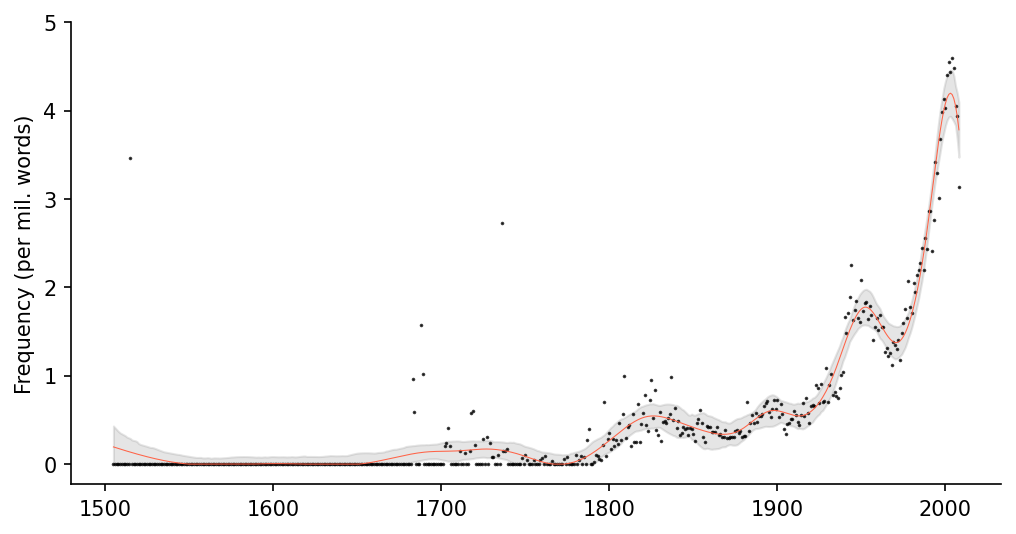

In [5]:
quiz_year_ts.timeviz_scatterplot();

A couple of things that are useful to note. First, the earliest data tends to have greater variability. This is to be expected, first, because data is more sparse, and second, because the OCR can be less reliable for older data because of typesetting, damage, etc.

Also, compare to what the Google online interface produces for an analagous search:


In [14]:
from IPython.display import IFrame

IFrame("https://books.google.com/ngrams/interactive_chart?content=quiz,+quizzes,+quizzed&year_start=1500&year_end=2022&corpus=en&smoothing=3" , width=900, height=500)


When considering these kinds of trajectories, it also useful to check other sources like the OED:

<https://www.oed.com/search/dictionary/?scope=Entries&q=quiz>

### Ground up periodization

One of the challenges in working with diachronic data is assigning or recognizing time periods. This is called "periodization". In some analyzes, this can seem arbitrary. It is common, for example, to bin data into centuries, half-centuries, etc. But these bins aren't necessarily statistically meaningful.

One alternative is called Variability-Based Neighbor Clustering. It was developed by Gries and Hilpert ([2008](https://www.euppublishing.com/doi/abs/10.3366/E1749503208000075), [2012](https://academic.oup.com/edited-volume/41359/chapter-abstract/352554199?redirectedFrom=fulltext&login=true&utm_source=TrendMD&utm_medium=cpc&utm_campaign=Oxford_Academic_Books_TrendMD_0)). The idea is to use hierarchical clustering to aid "bottom up" periodization of language change. Time periods with similar frequcenies will be clustered togehter.

#### Filtering

First, we'll want to filter our data. Looking at our scatterplot in combination with the OED information, it looks like 1800 is a good starting point.

To make the dendrogram simpler, we'll use the by-decade data.

In [8]:
quiz_decade = quiz_decade.filter(pl.col("Decade") >= 1800)
quiz_decade_ts = TimeSeries(time_series=quiz_decade, time_col='Decade', values_col='RF')

#### VNC

Now we can plot a dendrogram:

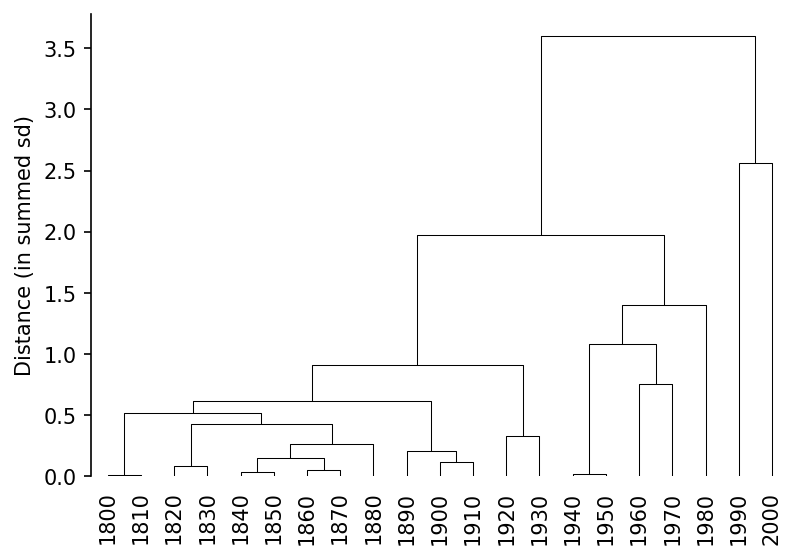

In [9]:
quiz_decade_ts.timeviz_vnc();

#### How many clusters?

Once we've generated a dendrogram the question, then, is how many clusters (or time periods) to we have?

For guidance, we can generate a screeplot and look at the "elbow":


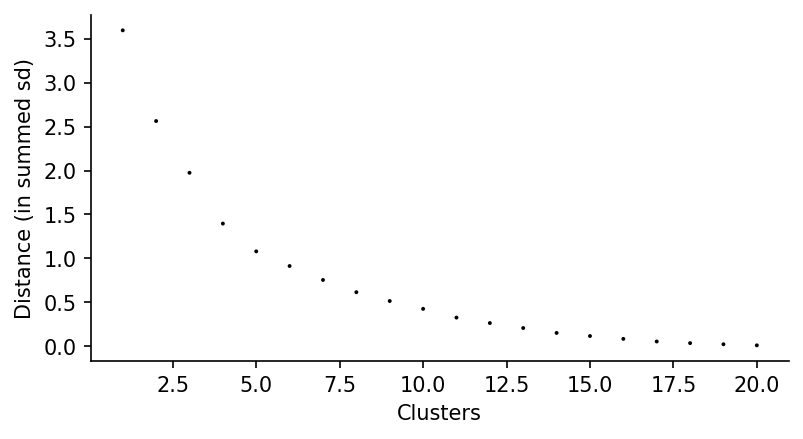

In [ ]:
quiz_decade_ts.timeviz_screeplot();

As is often the case, the screeplot is not "definitive". We need to make an analytical decision.

Looking at the dendrogram above and screeplot in combination, cutting into 4 or 5 clusters seems sensible.

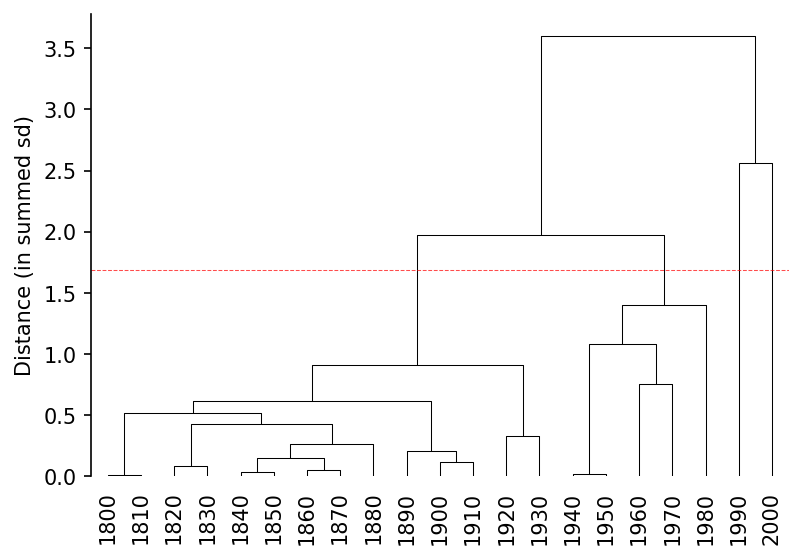

In [ ]:
quiz_decade_ts.timeviz_vnc(n_periods=4, cut_line=True);

#### Periodizing the dendgrogram

As an alternative to a cutline, all of the leaves under a specified number of time periods (or clusters) can be consolidatated. This can be particularly useful if we had a dendgram where each leaf was a year (rather than a decade) and therefore a much more complicated and difficult to read dendrogram.

We'll also change the orientation of the dendrogram:


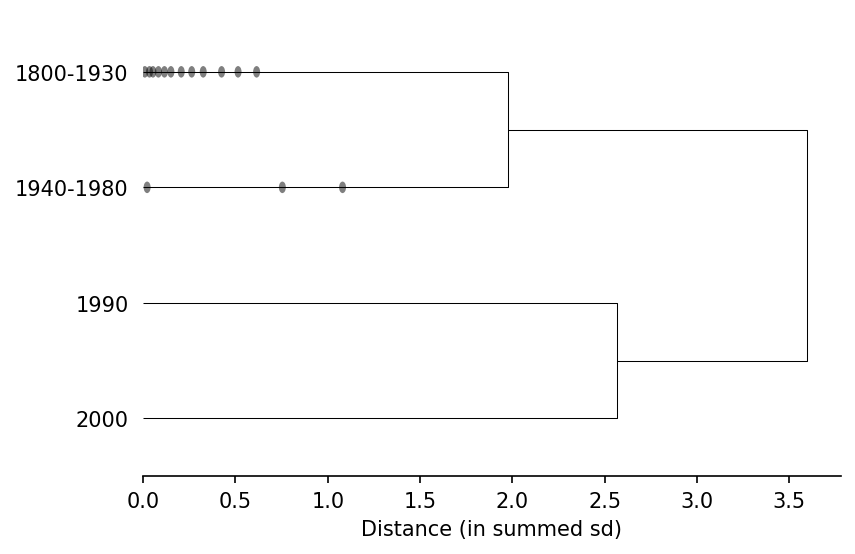

In [ ]:
quiz_decade_ts.timeviz_vnc(n_periods=4, periodize=True, orientation="vertical");

We can also check a summary of the cluster contents:

In [ ]:
quiz_decade_ts.cluster_summary()

Cluster 1 (n=14): ['1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930']
Cluster 2 (n=5): ['1940', '1950', '1960', '1970', '1980']
Cluster 3 (n=1): ['1990']
Cluster 4 (n=1): ['2000']


## ✅ Task 1

For this task, we're going to interrogate some of the claims made in [this study](https://journals.sagepub.com/doi/full/10.1177/0022022112455100) using Google N-gram data.

Their data looks at frequencies of first- and second-person pronouns.

The data requires fetching data from several diffent repos. To save time, I've already concatenated it into a table that you can read in directly.

In [10]:
all_pronouns = pl.read_csv("https://github.com/browndw/humanities_analytics/raw/refs/heads/main/data/data_tables/pronoun_frequencies.csv")

In [6]:
all_pronouns.head()

Year,AF_first_pl,RF_first_pl,AF_first_sing,RF_first_sing,AF_second,RF_second
i64,i64,f64,i64,f64,i64,f64
1800,104442,5672.49,236846,12863.66,98483,5348.84
1801,126814,6359.38,200603,10059.71,78919,3957.58
1802,115818,4958.84,162318,6949.77,69956,2995.22
1803,170391,6102.23,183530,6572.78,91388,3272.89
1804,134866,3743.74,170764,4740.23,80542,2235.76


The main claim in the study links changes in pronoun frequencies to changes in cultural attitudes (or social psychology):

> Change over time in culture can appear among individuals and in cultural products such as song lyrics, television, and books. This analysis examines changes in pronoun use in the Google Books ngram database of 766,513 American books published 1960-2008. We hypothesize that pronoun use will reflect increasing individualism and decreasing collectivism in American culture. Consistent with this hypothesis, the use of first person plural pronouns (e.g., *we*, *us*) decreased 10% first person singular pronouns (*I*, *me*) increased 42%, and second person pronouns (*you*, *your*) quadrupled. These results complement previous research finding increases in individualistic traits among Americans.

And the data visualization that they provide is a line plot.

<https://www.semanticscholar.org/paper/Changes-in-Pronoun-Use-in-American-Books-and-the-of-Twenge-Campbell/84a7c9cef45f9c5f83f29815116851a5e8cbb2c6/figure/0>

Note that their time period starts in 1960. We have data going back to 1800. So let's recreate a version of their multi-line plot with the expanded time-frame. For this we will use matplotlib.

And to get you started, we'll set our x-axis data, and our y-axes data:

In [21]:
from matplotlib import pyplot as plt

x = all_pronouns["Year"].to_numpy()
y_first_pl = all_pronouns["RF_first_pl"].to_numpy()
y_first_sl = all_pronouns["RF_first_sing"].to_numpy()
y_second = all_pronouns["RF_second"].to_numpy()

Now you should be able to build the plot. You can find some [guidance](https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/) here.

In [ ]:
# your code here

### 🤔 Question

Based on the new plot, how would you evaluate the claim above? Do those hold up to methodological scrutiny? Or do they raise questions for you? Are there parts of the analysis that seem more defensible? Or others that seem more wobbly? The goal is not to level a harsh critique, rather it is to explore how the diachronic data is being presented and analyzed.

---

## 💬 Discussion Questions

After working through this mini lab, reflect on these questions:

1. **Data Sparsity and Reliability**: The tutorial notes that earlier data (pre-1800) shows greater variability due to sparsity and OCR issues. How should this affect your interpretation of trends? At what point does data become "reliable enough" for claims about language change?

2. **Periodization Choices**: Variability-Based Neighbor Clustering offers "bottom-up" periodization instead of arbitrary bins (centuries, decades). But you still have to choose the number of clusters. How is this choice different from (or similar to) choosing decade bins? What makes one approach more "objective"?

3. **Smoothing and Trends**: Compare the raw scatterplot to Google's smoothed ngram viewer. What does smoothing reveal? What does it hide? When might you prefer one visualization over the other?

4. **Cultural Interpretation**: The pronoun study links linguistic change (pronoun frequencies) to psychological change (individualism). What evidence would make this link convincing? What alternative explanations might account for the same patterns?

5. **Time Frame Effects**: The original study examined 1960-2008. When you expand to 1800-2008, how does the interpretation change? Does the trend look more dramatic, less dramatic, or qualitatively different?

6. **Association vs. Causation**: Time series data shows correlations over time, but establishing causation is much harder. What kind of evidence beyond frequency trends would you need to argue that cultural attitudes *cause* linguistic change (or vice versa)?

---

## 🔬 Ideas for Further Experimentation

If you want to explore time series analysis further, try these extensions:

1. **Genre-Specific Trends**: Use the `variety` parameter to compare British English (`eng-gb-all`) vs. American English (`eng-us-all`) vs. fiction (`eng-fiction-all`). Do pronoun trends differ across these varieties?

2. **Related Words**: Instead of just pronouns, track related semantic fields. Compare first-person pronouns with words like "individual," "self," "personal" vs. collectivist terms like "community," "together," "shared."

3. **VNC Analysis on Your Data**: Apply Variability-Based Neighbor Clustering to the pronoun data. Do the cluster boundaries align with known historical periods (pre-WWI, interwar, post-WWII, digital age)? Or do they reveal different periodization?

4. **Normalization Effects**: Google Ngrams provides both raw counts and relative frequencies. Try downloading both and comparing how normalization affects trend interpretation. Does relative frequency change the story?

5. **Multi-Line Comparisons**: Create visualizations comparing multiple trends simultaneously. For example, plot "I" vs. "we" vs. "you" on the same graph with different colors. Use dual y-axes if scales differ dramatically.

6. **Statistical Testing**: Beyond visualization, consider whether observed changes are statistically significant. Explore time series methods like change-point detection or regression analysis to quantify trends and test hypotheses formally.